In [2]:
#包引入
import numpy as np
import matplotlib.pyplot as plt
import random
np.random.seed(0)

In [12]:
#产生数据集
def get_dataset():
    dataset=[]
    x11=np.random.normal(-5,1,200)
    x12=np.random.normal(0,1,200)
    x21=np.random.normal(0,1,200)
    x22=np.random.normal(5,1,200)
    for i in range(len(x11)):
        dataset.append([1,x11[i],x12[i],1])
        dataset.append([1,x21[i],x22[i],-1])
    dataset=np.array(dataset)
    random.shuffle(dataset)
    train_set=dataset[0:320]
    test_set=dataset[320:]
    return train_set,test_set

In [13]:
#获得训练集和测试集，并显示其中一部分数据
train_set,test_set=get_dataset()
print('traing set:\n',train_set[0:4])
print('test set:\n',test_set[0:4])

traing set:
 [[ 1.         -3.23594765 -0.36918184  1.        ]
 [ 1.         -3.23594765 -0.36918184  1.        ]
 [ 1.         -0.59865394  3.44957065 -1.        ]
 [ 1.         -0.59865394  3.44957065 -1.        ]]
test set:
 [[ 1.         -4.1975436   0.09435159  1.        ]
 [ 1.         -4.5606083  -0.4533858   1.        ]
 [ 1.         -4.57166813  0.69474914  1.        ]
 [ 1.         -4.02336096 -1.06001582  1.        ]]


In [14]:
#weight为一个3×1的行向量，每个point也是一个行向量
#以下是pla算法的实现
random_init=True
if random_init==True:
    weight=np.random.normal(0,1,3)
else:
    weight=np.array([2.,2.,2.])
def pla(weight,train_data,max_itera):
    for i in range(max_itera):
        error=False
        for j in range(train_data.shape[0]):
            if np.dot(weight,train_data[j][0:-1])*train_data[j][-1]<0:
                error=True
                print('分类面更新,更新前为:\n',weight)
                weight+=train_data[j][-1]*train_data[j][0:-1]
                print('更新后为\n',weight)
        if error==False:
            print('线性可分，找到分类面')
            return weight
        elif i==max_itera-1:
            error_rate=0
            for k in range(train_data.shape[0]):
                if np.dot(weight,train_data[k][0:-1])*train_data[j][-1]<0:
                    error_rate+=1
            print('未能找到分类面，正确率为：',1-error_rate/train_data.shape[0])
            return weight

In [15]:
#用pla算法训练出一个分类面
new_weight=pla(weight,train_set,200)

分类面更新,更新前为:
 [ 1.41117206  0.78580383 -0.05746952]
更新后为
 [ 2.41117206 -2.45014383 -0.42665136]
分类面更新,更新前为:
 [ 2.41117206 -2.45014383 -0.42665136]
更新后为
 [ 1.41117206 -1.85148989 -3.87622201]
线性可分，找到分类面


In [16]:
#画图函数
def draw(dataset, weight):
    x_po= []
    y_po= []
    x_ne= []
    y_ne= []
    for i in range(dataset.shape[0]):
        if dataset[i][-1] == 1:
            x_po.append(dataset[i][1])
            y_po.append(dataset[i][2])
        elif dataset[i][-1] == -1:
            x_ne.append(dataset[i][1])
            y_ne.append(dataset[i][2])

    x_line=np.linspace(-9, 9, 100)
    y_line = -(weight[1] / weight[2]) * x_line + weight[0] / weight[2]
    plt.scatter(x_po, y_po, color='red', s=50, label='positive')
    plt.scatter(x_ne, y_ne, color='green', s=50, label='negative')
    plt.plot(x_line, y_line, color='yellow', label='boundary')
    plt.legend(loc='best')
    plt.show()

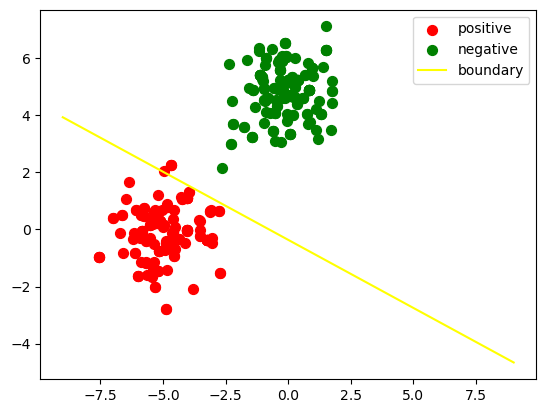

In [17]:
draw(train_set,new_weight)

测试集上的正确率为:100.0%


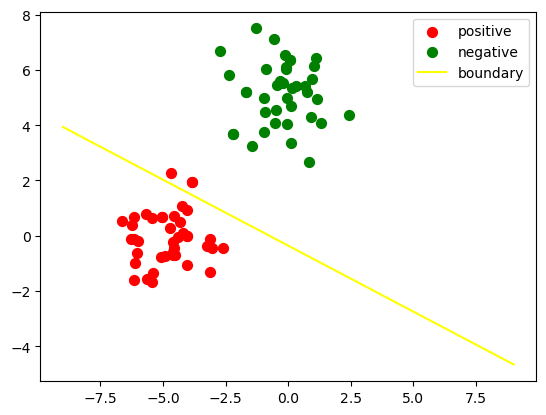

In [18]:
#测试函数
def eval(test_set,weight):
    error_rate=0
    for j in range(test_set.shape[0]):
        if np.dot(weight,test_set[j][0:-1])*test_set[j][-1]<0:
            error_rate+=1
    print('测试集上的正确率为:{}%'.format((1-error_rate/test_set.shape[0])*100))
    draw(test_set,weight)
eval(test_set,new_weight)

In [4]:
#pocket算法实现
weight=np.random.normal(0,1,3)
#取出分类错误的数据
def get_error_set(weight,set):
    error_set=[]
    for j in range(set.shape[0]):
        if np.dot(weight,set[j][0:-1])*set[j][-1]<0:
            error_set.append(set[j])
    return np.array(error_set)
def pocket(train_data,weight,iteration):
    weight_hat=np.random.normal(0,1,3)
    for i in range(train_data.shape[0]):
        error_set=get_error_set(weight,train_data)
        if error_set.shape[0]==0:
            print('线性可分')
            return weight
        print('候选w参数更新，原为:\n',weight)
        weight+=error_set[0][0:-1]*error_set[0][-1]
        print('现为:\n',weight)
        if error_set.shape[0]<get_error_set(weight_hat,train_data).shape[0]:
            print('候选w取代最优w')
            weight_hat=weight
            print('在错误集合里面随机选择一个样本用于更新')
            rand_example=error_set[int(np.random.choice(range(error_set.shape[0]),1))]
            print('候选w参数更新，原为:\n',weight)
            weight+=rand_example[0:-1]*rand_example[-1]
            print('现为:\n',weight)
    return weight_hat
new_weight=pocket(train_set,weight,200)

NameError: name 'train_set' is not defined

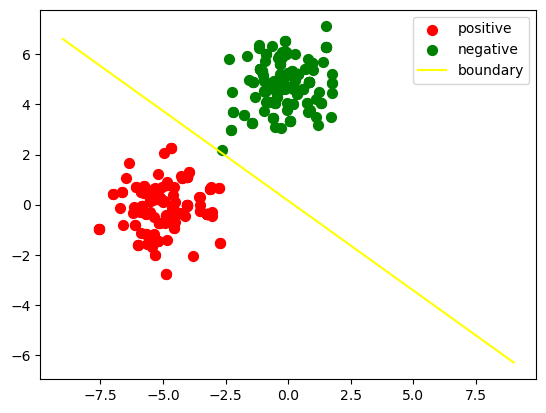

In [20]:
#画出训练集和分类面
draw(train_set,weight)

测试集上的正确率为:100.0%


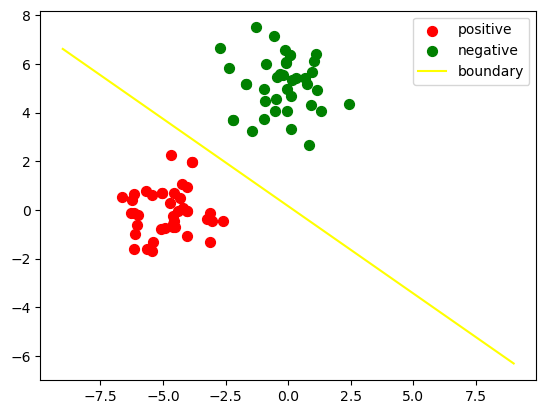

In [21]:
#画出测试集和分类面
eval(test_set,weight)

In [22]:
#改变数据集分布
def get_new_dataset():
    dataset=[]
    x11=np.random.normal(1,1,200)
    x12=np.random.normal(0,1,200)
    x21=np.random.normal(0,1,200)
    x22=np.random.normal(1,1,200)
    for i in range(len(x11)):
        dataset.append([1,x11[i],x12[i],1])
        dataset.append([1,x21[i],x22[i],-1])
    dataset=np.array(dataset)
    random.shuffle(dataset)
    train_set=dataset[0:320]
    test_set=dataset[320:]
    return train_set,test_set
train_set,test_set=get_new_dataset()

分类面更新,更新前为:
 [2. 2. 2.]
更新后为
 [1.         0.37877607 1.97348082]
分类面更新,更新前为:
 [1.         0.37877607 1.97348082]
更新后为
 [ 0.         -0.08476369  0.22517675]
分类面更新,更新前为:
 [ 0.         -0.08476369  0.22517675]
更新后为
 [-1.         -0.54830346 -1.52312732]
分类面更新,更新前为:
 [-1.         -0.54830346 -1.52312732]
更新后为
 [ 0.          1.12682984 -0.12068163]
分类面更新,更新前为:
 [ 0.          1.12682984 -0.12068163]
更新后为
 [-1.         -0.49439408 -0.14720081]
分类面更新,更新前为:
 [-1.         -0.49439408 -0.14720081]
更新后为
 [ 0.          0.51252547 -1.07410995]
分类面更新,更新前为:
 [ 0.          0.51252547 -1.07410995]
更新后为
 [1.         0.76039176 0.59695191]
分类面更新,更新前为:
 [1.         0.76039176 0.59695191]
更新后为
 [0.         0.23542975 1.03722714]
分类面更新,更新前为:
 [0.         0.23542975 1.03722714]
更新后为
 [-1.          1.33906622 -0.10507524]
分类面更新,更新前为:
 [-1.          1.33906622 -0.10507524]
更新后为
 [0.         1.82175487 0.38058036]
分类面更新,更新前为:
 [0.         1.82175487 0.38058036]
更新后为
 [ 1.          1.76039429 -0.62234515]
分类面更新,

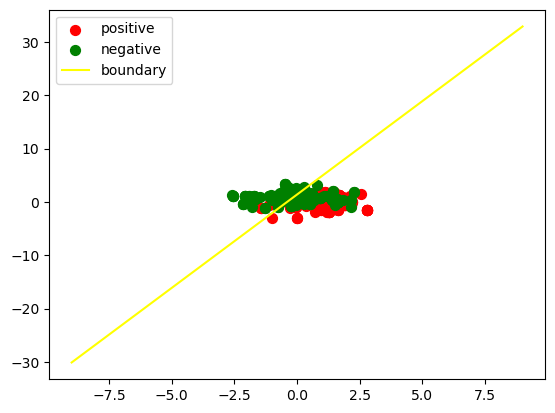

测试集上的正确率为:71.25%


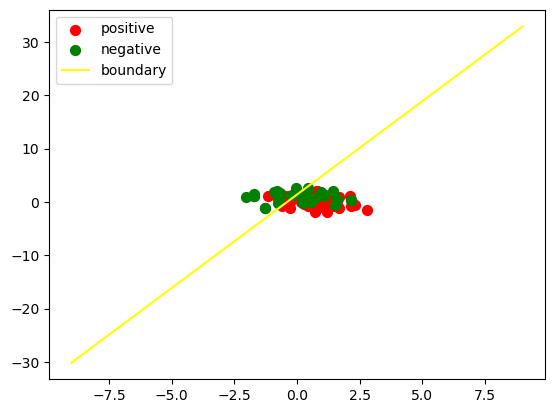

In [23]:
random_init=False
if random_init==True:
    weight=np.random.normal(0,1,3)
else:
    weight=np.array([2.,2.,2.])
#用pla算法训练出一个分类面
weight=pla(weight,train_set,200)
eval(train_set,weight)
eval(test_set,weight)

候选w参数更新，原为:
 [2. 2. 2.]
现为:
 [1.         0.37877607 1.97348082]
候选w取代最优w
在错误集合里面随机选择一个样本用于更新
候选w参数更新，原为:
 [1.         0.37877607 1.97348082]
现为:
 [ 0.         -0.08476369  0.22517675]
候选w参数更新，原为:
 [ 0.         -0.08476369  0.22517675]
现为:
 [1.         0.80277032 0.26551844]
候选w参数更新，原为:
 [1.         0.80277032 0.26551844]
现为:
 [ 0.         -0.81845361  0.23899926]
候选w取代最优w
在错误集合里面随机选择一个样本用于更新
候选w参数更新，原为:
 [ 0.         -0.81845361  0.23899926]
现为:
 [-1.         -1.09987578 -2.60070617]
候选w参数更新，原为:
 [-1.         -1.09987578 -2.60070617]
现为:
 [ 0.         -0.21234176 -2.56036448]
候选w参数更新，原为:
 [ 0.         -0.21234176 -2.56036448]
现为:
 [ 1.          0.67519225 -2.52002279]
候选w参数更新，原为:
 [ 1.          0.67519225 -2.52002279]
现为:
 [ 0.         -0.94603167 -2.54654197]
候选w取代最优w
在错误集合里面随机选择一个样本用于更新
候选w参数更新，原为:
 [ 0.         -0.94603167 -2.54654197]
现为:
 [-1.         -0.6999608  -1.79018867]
候选w参数更新，原为:
 [-1.         -0.6999608  -1.79018867]
现为:
 [ 0.          0.18757322 -1.74984698]
候选w参数更新，原为:


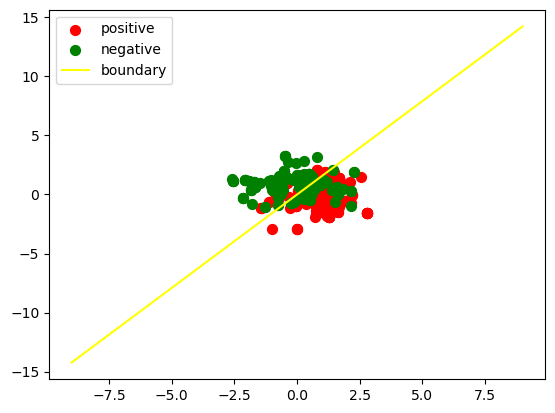

测试集上的正确率为:72.5%


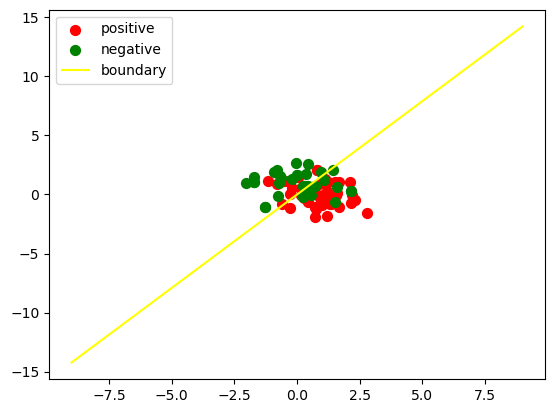

In [32]:
random_init=False
if random_init==True:
    weight=np.random.normal(0,1,3)
else:
    weight=np.array([2.,2.,2.])
#pocket算法训练分类面
weight=pocket(train_set,weight,30)
eval(train_set,weight)
eval(test_set,weight)

候选w参数更新，原为:
 [ 1.66387312 -0.08382088  1.54426354]
现为:
 [ 0.66387312 -1.7050448   1.51774435]
候选w参数更新，原为:
 [ 0.66387312 -1.7050448   1.51774435]
现为:
 [ 1.66387312 -0.81751079  1.55808604]
候选w参数更新，原为:
 [ 1.66387312 -0.81751079  1.55808604]
现为:
 [ 0.66387312 -2.43873472  1.53156686]
候选w参数更新，原为:
 [ 0.66387312 -2.43873472  1.53156686]
现为:
 [ 1.66387312 -1.5512007   1.57190855]
候选w参数更新，原为:
 [ 1.66387312 -1.5512007   1.57190855]
现为:
 [ 0.66387312 -2.01474046 -0.17639552]
候选w参数更新，原为:
 [ 0.66387312 -2.01474046 -0.17639552]
现为:
 [ 1.66387312 -1.12720645 -0.13605383]
候选w参数更新，原为:
 [ 1.66387312 -1.12720645 -0.13605383]
现为:
 [ 0.66387312 -1.59074621 -1.8843579 ]
候选w参数更新，原为:
 [ 0.66387312 -1.59074621 -1.8843579 ]
现为:
 [ 1.66387312 -0.70321219 -1.84401621]
候选w参数更新，原为:
 [ 1.66387312 -0.70321219 -1.84401621]
现为:
 [ 0.66387312 -2.32443612 -1.87053539]
候选w取代最优w
在错误集合里面随机选择一个样本用于更新
候选w参数更新，原为:
 [ 0.66387312 -2.32443612 -1.87053539]
现为:
 [-0.33612688 -1.6978355  -1.9044673 ]
候选w参数更新，原为:
 [-0.33612688 -1.69

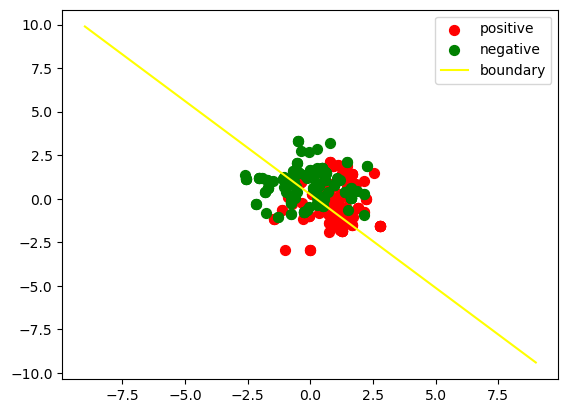

测试集上的正确率为:41.25%


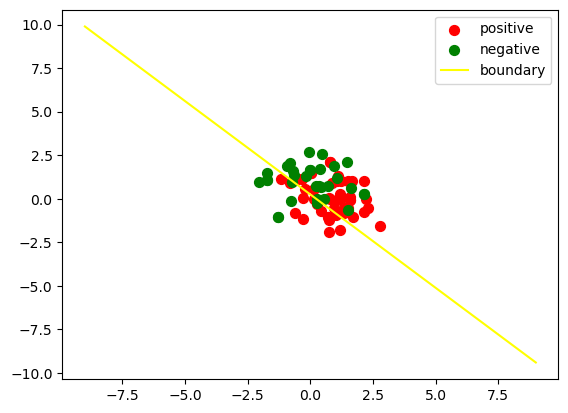

In [33]:
#改变超参
random_init=True
if random_init==True:
    weight=np.random.normal(0,1,3)
else:
    weight=np.array([2.,2.,2.])
#pocket算法训练分类面
weight=pocket(train_set,weight,40)
eval(train_set,weight)
eval(test_set,weight)

候选w参数更新，原为:
 [-1.14935554  0.15347005 -0.19249695]
现为:
 [-0.14935554  1.121499   -0.70137117]
候选w参数更新，原为:
 [-0.14935554  1.121499   -0.70137117]
现为:
 [ 0.85064446 -0.36885447 -1.59510936]
候选w取代最优w
在错误集合里面随机选择一个样本用于更新
候选w参数更新，原为:
 [ 0.85064446 -0.36885447 -1.59510936]
现为:
 [-0.14935554 -0.72128519 -1.73748587]
候选w参数更新，原为:
 [-0.14935554 -0.72128519 -1.73748587]
现为:
 [ 0.85064446  0.40186462 -1.56579948]
候选w参数更新，原为:
 [ 0.85064446  0.40186462 -1.56579948]
现为:
 [-0.14935554 -3.0162678  -2.64990336]
候选w取代最优w
在错误集合里面随机选择一个样本用于更新
候选w参数更新，原为:
 [-0.14935554 -3.0162678  -2.64990336]
现为:
 [-1.14935554 -3.36217433 -3.07968543]
候选w参数更新，原为:
 [-1.14935554 -3.36217433 -3.07968543]
现为:
 [-0.14935554 -2.39414537 -3.58855965]
候选w参数更新，原为:
 [-0.14935554 -2.39414537 -3.58855965]
现为:
 [ 0.85064446 -1.42611642 -4.09743387]
候选w参数更新，原为:
 [ 0.85064446 -1.42611642 -4.09743387]
现为:
 [ 1.85064446 -0.30296662 -3.92574749]
候选w参数更新，原为:
 [ 1.85064446 -0.30296662 -3.92574749]
现为:
 [ 0.85064446  1.32579523 -4.51824526]
候选

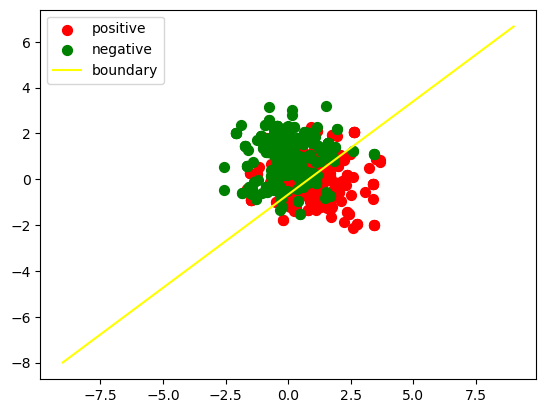

测试集上的正确率为:75.625%


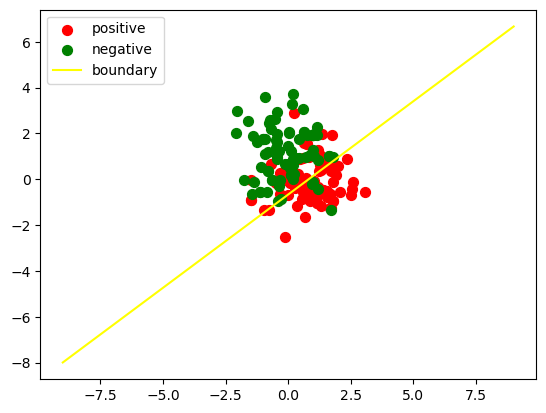

In [35]:
#改变样本数量
#改变数据集数量
def get_new_dataset():
    dataset=[]
    x11=np.random.normal(1,1,400)
    x12=np.random.normal(0,1,400)
    x21=np.random.normal(0,1,400)
    x22=np.random.normal(1,1,400)
    for i in range(len(x11)):
        dataset.append([1,x11[i],x12[i],1])
        dataset.append([1,x21[i],x22[i],-1])
    dataset=np.array(dataset)
    random.shuffle(dataset)
    train_set=dataset[0:640]
    test_set=dataset[640:]
    return train_set,test_set
train_set,test_set=get_new_dataset()
random_init=True
if random_init==True:
    weight=np.random.normal(0,1,3)
else:
    weight=np.array([2.,2.,2.])
#pocket算法训练分类面
weight=pocket(train_set,weight,22)
eval(train_set,weight)
eval(test_set,weight)

候选w参数更新，原为:
 [0.18559982 1.74492209 0.01328599]
现为:
 [-0.81440018  0.95780641 -2.542333  ]
候选w取代最优w
在错误集合里面随机选择一个样本用于更新
候选w参数更新，原为:
 [-0.81440018  0.95780641 -2.542333  ]
现为:
 [-1.81440018  0.66580063 -4.45275582]
候选w参数更新，原为:
 [-1.81440018  0.66580063 -4.45275582]
现为:
 [-0.81440018  3.26466912 -4.26253071]
候选w参数更新，原为:
 [-0.81440018  3.26466912 -4.26253071]
现为:
 [ 0.18559982  4.44924028 -2.68425607]
候选w取代最优w
在错误集合里面随机选择一个样本用于更新
候选w参数更新，原为:
 [ 0.18559982  4.44924028 -2.68425607]
现为:
 [ 1.18559982  5.19281143 -1.80808697]
候选w参数更新，原为:
 [ 1.18559982  5.19281143 -1.80808697]
现为:
 [ 0.18559982  4.40569575 -4.36370595]
候选w参数更新，原为:
 [ 0.18559982  4.40569575 -4.36370595]
现为:
 [ 1.18559982  5.59026691 -2.78543132]
候选w取代最优w
在错误集合里面随机选择一个样本用于更新
候选w参数更新，原为:
 [ 1.18559982  5.59026691 -2.78543132]
现为:
 [ 2.18559982  6.33383806 -1.90926221]
候选w参数更新，原为:
 [ 2.18559982  6.33383806 -1.90926221]
现为:
 [ 1.18559982  5.54672237 -4.4648812 ]
候选w参数更新，原为:
 [ 1.18559982  5.54672237 -4.4648812 ]
现为:
 [ 0.18559982  

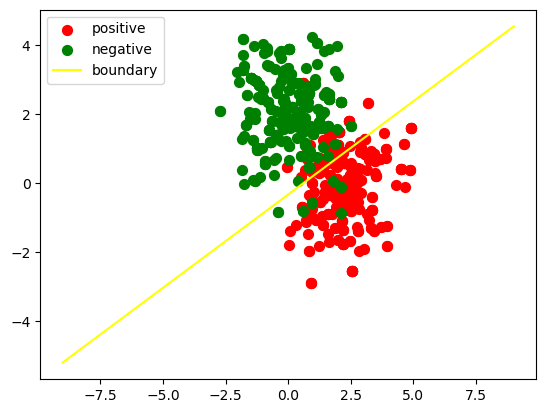

测试集上的正确率为:92.5%


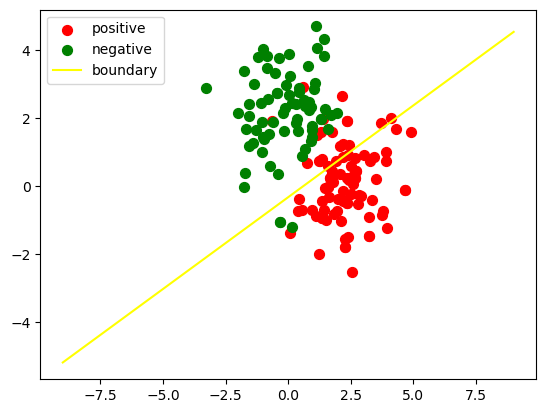

In [38]:
#改变样本分布
def get_new_dataset():
    dataset=[]
    x11=np.random.normal(2,1,400)
    x12=np.random.normal(0,1,400)
    x21=np.random.normal(0,1,400)
    x22=np.random.normal(2,1,400)
    for i in range(len(x11)):
        dataset.append([1,x11[i],x12[i],1])
        dataset.append([1,x21[i],x22[i],-1])
    dataset=np.array(dataset)
    random.shuffle(dataset)
    train_set=dataset[0:640]
    test_set=dataset[640:]
    return train_set,test_set
train_set,test_set=get_new_dataset()
random_init=True
if random_init==True:
    weight=np.random.normal(0,1,3)
else:
    weight=np.array([2.,2.,2.])
#pocket算法训练分类面
weight=pocket(train_set,weight,22)
eval(train_set,weight)
eval(test_set,weight)

In [6]:
#以下是获得作业题的结果
def get_error_set(weight,set):
    error_set=[]
    for j in range(set.shape[0]):
        if np.dot(weight,set[j][0:-1])*set[j][-1]<0:
            error_set.append(set[j])
    return np.array(error_set)
def data():
    a=[[1,0.2,0.7,1],
    [1,0.3,0.3,1],
    [1,0.4,0.5,1],
    [1,0.6,0.5,1],
    [1,0.1,0.4,1],
    [1,0.4,0.6,-1],
    [1,0.6,0.2,-1],
    [1,0.7,0.4,-1],
    [1,0.8,0.6,-1],
    [1,0.7,0.5,-1]]
    dataset=np.array(a)
    random.shuffle(dataset)
    return dataset
def pocket(train_data,weight,iteration):
    weight_hat=np.random.normal(0,1,3)
    for i in range(train_data.shape[0]):
        error_set=get_error_set(weight,train_data)
        if error_set.shape[0]==0:
            print('线性可分')
            return weight
        print('以下样本分类错误：\n',error_set[0])
        print('候选w参数更新，原为:\n',weight)
        weight+=error_set[0][0:-1]*error_set[0][-1]
        print('现为:\n',weight)
        if error_set.shape[0]<get_error_set(weight_hat,train_data).shape[0]:
            print('候选w取代最优w')
            weight_hat=weight
            print('在错误集合里面随机选择一个样本用于更新')
            rand_example=error_set[int(np.random.choice(range(error_set.shape[0]),1))]
            print(rand_example)
            print('候选w参数更新，原为:\n',weight)
            weight+=rand_example[0:-1]*rand_example[-1]
            print('现为:\n',weight)
    return weight_hat
dataset=data()
weight=np.random.normal(0,1,3)
new_weight=pocket(dataset,weight,20)

以下样本分类错误：
 [ 1.   0.7  0.4 -1. ]
候选w参数更新，原为:
 [ 0.33367433  1.49407907 -0.20515826]
现为:
 [-0.66632567  0.79407907 -0.60515826]
候选w取代最优w
在错误集合里面随机选择一个样本用于更新
[ 1.   0.4  0.6 -1. ]
候选w参数更新，原为:
 [-0.66632567  0.79407907 -0.60515826]
现为:
 [-1.66632567  0.39407907 -1.20515826]
以下样本分类错误：
 [1.  0.2 0.7 1. ]
候选w参数更新，原为:
 [-1.66632567  0.39407907 -1.20515826]
现为:
 [-0.66632567  0.59407907 -0.50515826]
以下样本分类错误：
 [1.  0.2 0.7 1. ]
候选w参数更新，原为:
 [-0.66632567  0.59407907 -0.50515826]
现为:
 [0.33367433 0.79407907 0.19484174]
以下样本分类错误：
 [ 1.   0.7  0.4 -1. ]
候选w参数更新，原为:
 [0.33367433 0.79407907 0.19484174]
现为:
 [-0.66632567  0.09407907 -0.20515826]
候选w取代最优w
在错误集合里面随机选择一个样本用于更新
[ 1.   0.4  0.6 -1. ]
候选w参数更新，原为:
 [-0.66632567  0.09407907 -0.20515826]
现为:
 [-1.66632567 -0.30592093 -0.80515826]
以下样本分类错误：
 [1.  0.2 0.7 1. ]
候选w参数更新，原为:
 [-1.66632567 -0.30592093 -0.80515826]
现为:
 [-0.66632567 -0.10592093 -0.10515826]
以下样本分类错误：
 [1.  0.2 0.7 1. ]
候选w参数更新，原为:
 [-0.66632567 -0.10592093 -0.10515826]
现为:
 [0.33367